# Human Connectome Pipeline

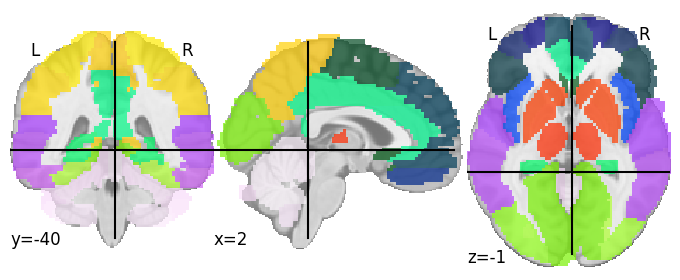

In [6]:
aal_atlas = datasets.fetch_atlas_aal()
plotting.plot_roi(aal_atlas.maps)

In [1]:
import nibabel as nib
import numpy as np
from nilearn.connectome import ConnectivityMeasure
from nilearn import datasets
from nilearn.datasets import fetch_atlas_aal
from nilearn.maskers import NiftiLabelsMasker
import igraph as ig

# Load AAL-masker from Nilearn
aal = datasets.fetch_atlas_aal()
aal_img = nib.load(aal.maps)
# Load Resting-State-fMRI-Data
resting_state = nib.load('/path_to/100408_3T_rfMRI_REST1_LR.nii.gz')

# Create Masker
masker = NiftiLabelsMasker(labels_img=aal_img, standardize=True)
# ROI timeseries
aal_array = masker.fit_transform(resting_state)

# Compute the correlation matrix
correlation_measure = ConnectivityMeasure(kind='correlation')
correlation_matrix = correlation_measure.fit_transform([aal_array])[0]
# List of ROI names
aal = datasets.fetch_atlas_aal()
roi_names = aal.labels
aal = fetch_atlas_aal()

# Get region labels and their corresponding label numbers
region_label = aal.indices
region_label_numbers = []
type(region_label_numbers)

for eintrag in region_label:
    integer_eintrag = int(eintrag)
    region_label_numbers.append(integer_eintrag)

# Load the Nifti file
aal_img = nib.load('/path_to/atlas/AAL.nii')
affine = aal_img.affine
aal_data = aal_img.get_fdata()

# Extract coordinates of the 116 regions
regions = region_label_numbers # List of region IDs
region_coords = []
for region_id in regions:
    region_mask = aal_data == region_id
    region_voxels = np.array(np.where(region_mask)).T
    
    # Convert voxel coordinates to physical coordinates
    region_coords_phys = nib.affines.apply_affine(affine, region_voxels)
    
    region_center = np.mean(region_coords_phys, axis=0)
    region_coords.append(region_center)

region_coords = np.array(region_coords)

# Creating graph g
g = ig.Graph()

# Adding Edges
num_nodes = 116
g.add_vertices(num_nodes)

node_coords = region_coords

# nodes' Coords
g.vs['x'] = node_coords[:, 0]
g.vs['y'] = node_coords[:, 1]
g.vs['z'] = node_coords[:, 2]

# Edges
correlation_matrix
threshold = 0.6

for i in range(num_nodes):
    for j in range(i+1, num_nodes):
        if abs(correlation_matrix[i, j]) >= threshold:
            g.add_edge(i, j)

# computing the most important measures
betweenness = g.betweenness()
degree = g.degree()
closeness = g.closeness()

# results
print("Betweenness-Zentralität:", betweenness)
print("Degree-Zentralität:", degree)
print("Closeness-Zentralität:", closeness)

Betweenness-Zentralität: [84.12158063073514, 140.6273042939312, 16.463659660522357, 68.40956272507024, 0.0, 56.19049190803408, 23.063209561704753, 133.25775463335344, 40.616136059331836, 64.78913260453403, 15.174589352548425, 93.49742492652695, 40.06199585984641, 213.17768621762465, 86.61008315468823, 51.15716455697614, 3.4276102879034704, 334.0475821884684, 52.35940692946233, 44.855001300676626, 0.0, 0.03125, 45.67462138863388, 27.967618862580718, 0.4433190369534944, 0.0, 0.0, 0.0, 23.760573946206126, 110.29954301373225, 114.1922966725176, 0.0, 84.83969642694552, 30.907637551760285, 45.7472826342893, 27.74862436043196, 3.7172503984765344, 100.826169110083, 119.63571808403388, 70.14925860917057, 0.25384615384615383, 0.0, 12.448932252562306, 0.0, 7.650696815569495, 12.448932252562306, 76.37143837220167, 2.4679802635186614, 25.012991450629567, 25.012991450629567, 25.012991450629567, 10.908124890359593, 0.0, 0.0, 158.5105578247969, 85.57407079587068, 115.04466039743606, 115.99733477328176

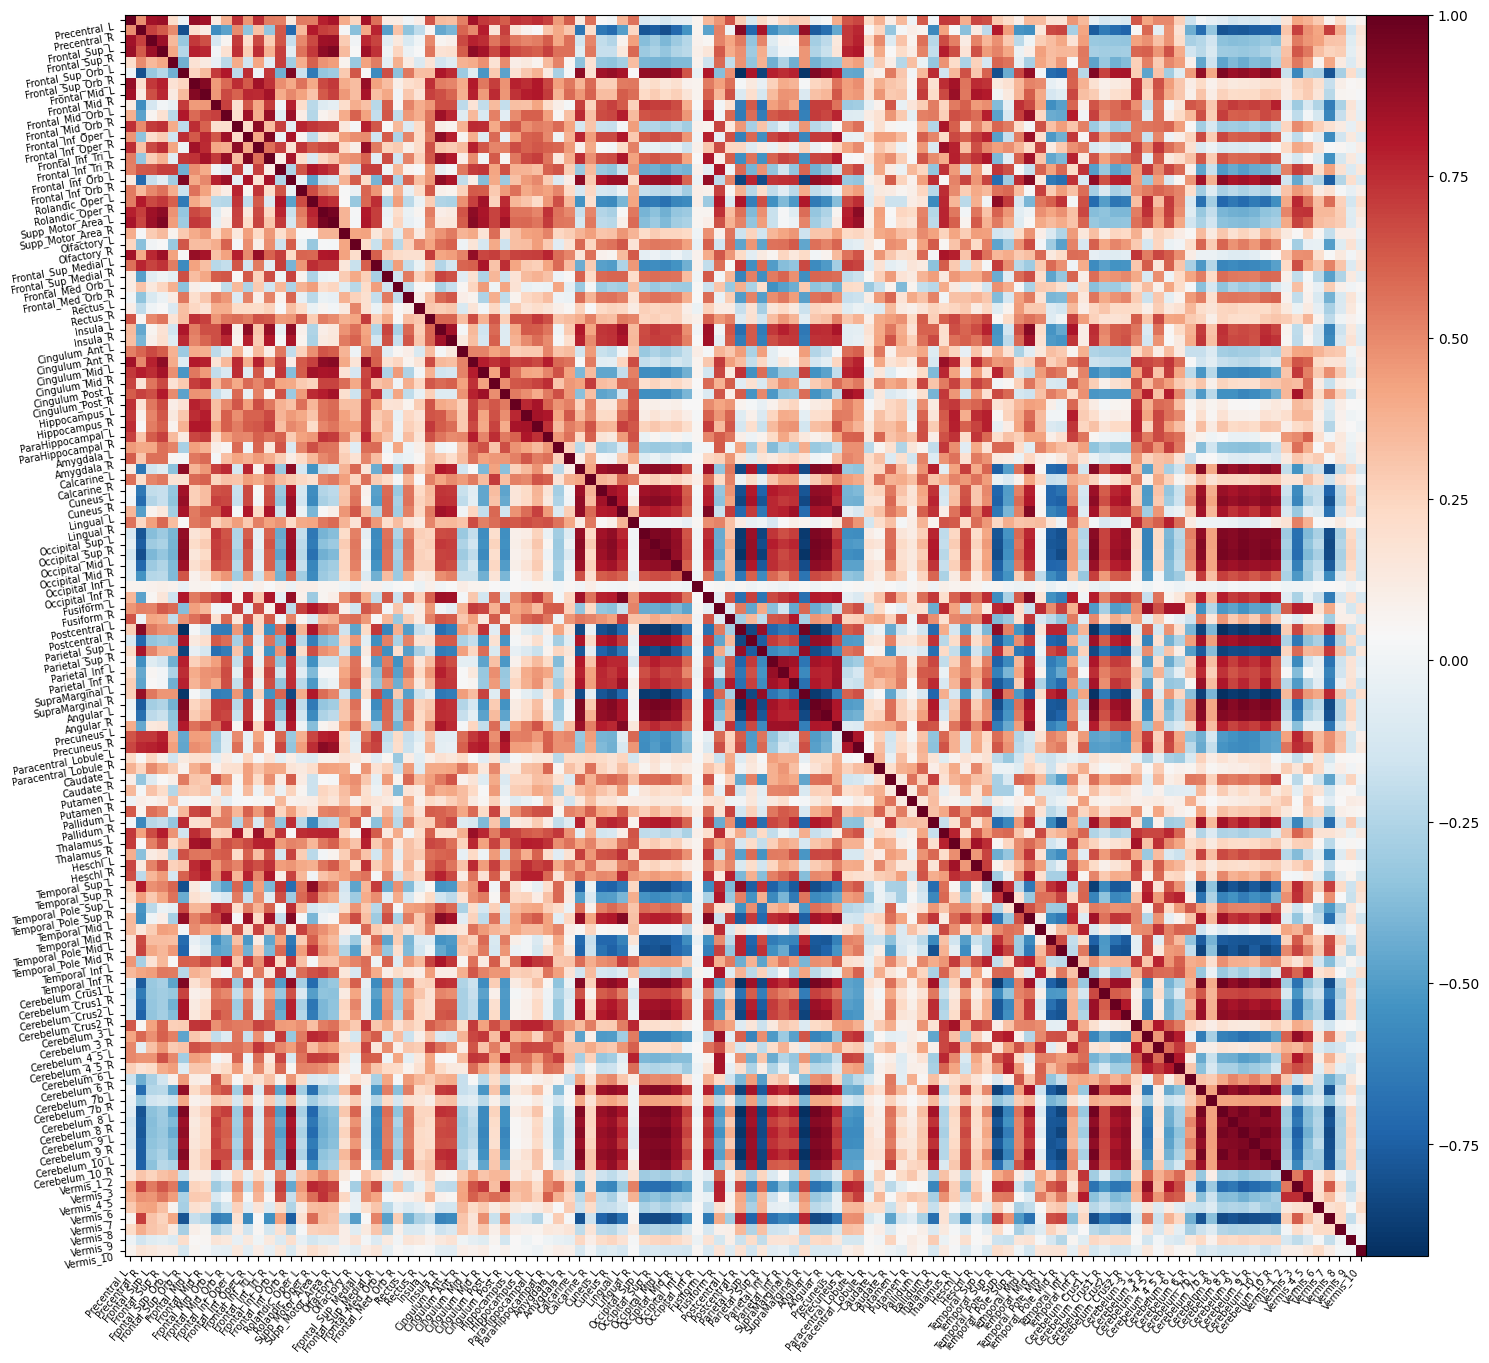

In [21]:
from nilearn import plotting

# Heatmap
plotting.plot_matrix(correlation_matrix, figure=(15, 15), labels=roi_names, colorbar=True)

# Graph
plotting.view_connectome(correlation_matrix, edge_threshold=0.6,
                         node_coords=region_coords)